In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from geopy.geocoders import Nominatim
from pandas_ods_reader import read_ods

#Set parameters to geolocate
geolocator = Nominatim(user_agent="useer_agent", domain='nominatim.openstreetmap.org')
geocode = partial(geolocator.geocode, language="it", country_codes = "ita")

#Reachable cities
dft = pd.read_csv("../Dati/distanze/times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
cities = dft.columns

def getLocation(name):
    geolocator = Nominatim(user_agent="useer_agent")
    geocode = partial(geolocator.geocode, language="it")
    location =geolocator.geocode(name)
    return location.latitude, location.longitude

In [2]:
#take times
coords = [ getLocation(city) for city in cities]

In [38]:
lat = [l[0] for l in coords]
lon = [l[1] for l in coords]

In [39]:
#Save list of cities and location
out=pd.Series(zip(cities, lat, lon))
df = pd.DataFrame(columns=["City", "Lat", "Lon"])
for x in out:
    df=df.append({'City':x[0], 'Lat':x[1], 'Lon':x[2]}, ignore_index=True)
df.to_csv("../Dati/altro/CitiesLocation.csv", sep=";", index=False)

In [40]:
df=pd.read_csv("../Dati/altro/CitiesLocation.csv", delimiter=';')
print(f"{df.Lon.min()}, {df.Lon.max()}, {df.Lat.min()}, {df.Lat.max()}")

9.4939091, 10.520690400000001, 44.9286315, 45.470343299999996


In [41]:
import math
lonmin = round(df.Lon.min()*100)/100
lonmax = math.ceil(df.Lon.max()*10)/10
latmin = (round(df.Lat.min() * 10)-1)/10
latmax = math.ceil(df.Lat.max()*100)/100

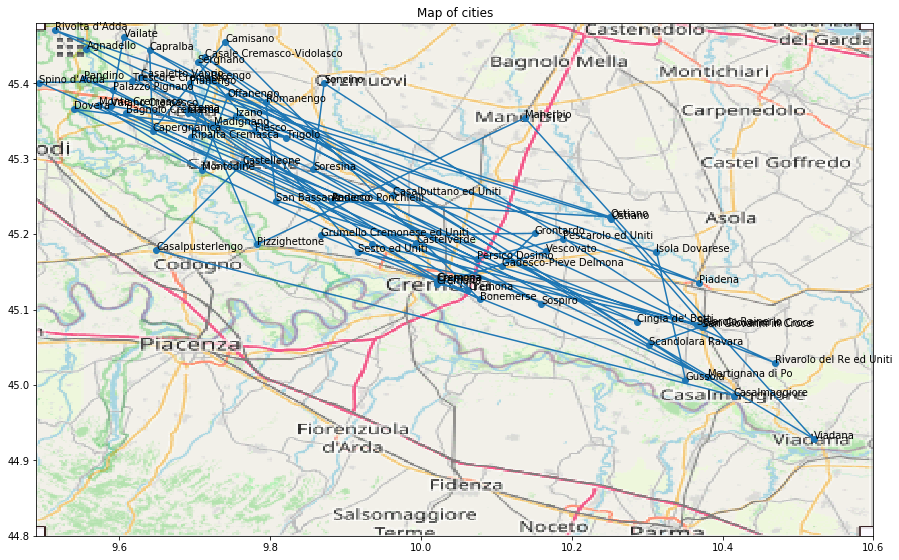

In [42]:
BBox = (lonmin, lonmax,
        latmin, latmax)
ruh_m = plt.imread('../Dati/altro/map.png')

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df.Lon, df.Lat, zorder=1, alpha=1, marker="o")
ax.set_title('Map of cities')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
for i, txt in enumerate(cities[:len(cities)-1]):
    try:
        ax.annotate(txt[:txt.index(',')], (coords[i][1], coords[i][0]), zorder=2)
    except:
        ax.annotate(txt, (coords[i][1], coords[i][0]), zorder=2)
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')


In [43]:
f1 = pd.read_csv("../Dati/turni_f/furgoncino1_routing.csv", sep=";")
def getCoords(string, z):
    paesi = [x[0] for x in z]
    return pd.Series(paesi).str.contains(string, case=False).values

y_positions = [pd.Series(coords)[getCoords(paese, out)].iloc[0][0] for paese in f1["lunedi"]]
x_positions = [pd.Series(coords)[getCoords(paese, out)].iloc[0][1] for paese in f1["lunedi"]]

In [44]:
f1["lunedi"]

0             sesto ed
1             grumello
2             SORESINA
3              TRIGOLO
4          CASTELLEONE
5            MONTODINE
6     ripalta cremasca
7              RICENGO
8             SERGNANO
9      CASALE CREMASCO
10            CAMISANO
11            CAPRALBA
12             SONCINO
13       pizzighettone
Name: lunedi, dtype: object

In [45]:
(x_positions, y_positions)

([9.9157889,
  9.8676043,
  9.8569465,
  9.8214565,
  9.7628119,
  9.709405303922916,
  9.6950522,
  9.7220765,
  9.7038163,
  9.7132586,
  9.7402424,
  9.640109670153539,
  9.8715521,
  9.7826089],
 [45.1761671,
  45.1982786,
  45.2858149,
  45.3279049,
  45.2930333,
  45.28547455,
  45.328255,
  45.40539,
  45.4277617,
  45.4350506,
  45.4550646,
  45.44410095,
  45.4002336,
  45.1863667])

In [46]:
ruh_m.shape

(352, 405, 4)

In [100]:
latmin:0=latmax:352
x=(45.1*352):latmax

44.8

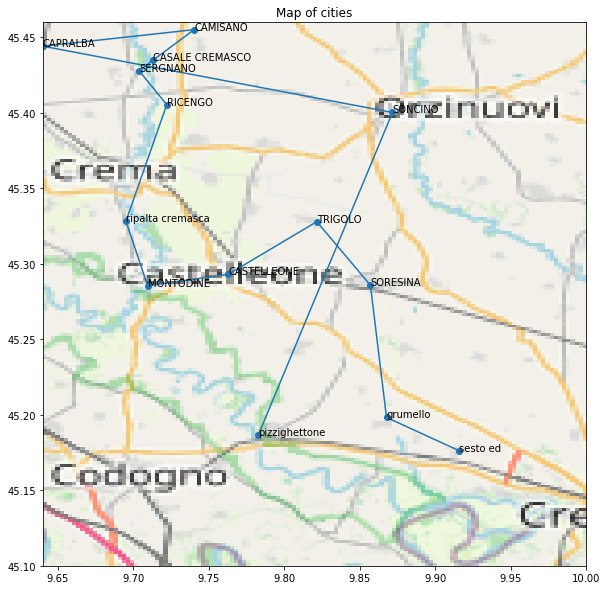

In [111]:
ruh_m = plt.imread('../Dati/altro/map.png')
nlonmin = round(min(x_positions)*100)/100
nlonmax = math.ceil(max(x_positions)*10)/10
nlatmin = (round(min(y_positions) * 10)-1)/10
nlatmax = math.ceil(max(y_positions)*100)/100
xmin = round((405*(nlonmin-lonmin))/(lonmax-lonmin))
xmax = round((405*(nlonmax-lonmin))/(lonmax-lonmin))
ymin = round(352*((nlatmin-latmin) / (latmax-latmin)))
ymax = round(352*((nlatmax-latmin) / (latmax-latmin)))
ruh_m = ruh_m[352-ymax:352-ymin, xmin:xmax]

BBox = (nlonmin, nlonmax,
        nlatmin, nlatmax)
fig, ax = plt.subplots(figsize = (15,10))

ax.plot(x_positions, y_positions, zorder=1, alpha=1, marker="o")
ax.set_title('Map of cities')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
for i, txt in enumerate(f1["lunedi"][:len(f1["lunedi"])]):
    try:
        ax.annotate(txt[:txt.index(',')], (x_positions[i], y_positions[i]), zorder=2, aplha=0.5)
    except:
        ax.annotate(txt, (x_positions[i], y_positions[i]), zorder=2)
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

